# **Author  : Syed Yousuf Zaidi**
### **The Sparks Foundation GRIP Task 2**

**Data Science & Business Analytics Intern May Batch 2021**

## *Task 2:-Prediction using Unsupervised Machine Learning*


### Objective : From the given ‘Iris’ dataset, Predict the optimum number of clusters and represent it visually ;

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

#### Loading the required dataset...

In [2]:
Data="Iris.csv"
Task_2=pd.read_csv(Data)
print("Syed : Data loaded successfully")

Syed : Data loaded successfully


### Let's explore our Dataset

In [3]:
Task_2.head() #To get the first five no.of rows & columns present

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Task_2.tail() #To get the last five no.of rows & columns present

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
Task_2.info()  #To get the information about the various data-type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
Task_2.describe()  #To get complete statistical knowledge about the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
Task_2.size   #To get total size of dataset

900

In [8]:
Task_2.shape  #To get total no.of rows & columns

(150, 6)

### Check for the null value if present !!

In [9]:
Task_2.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
Task_2.drop({"Id","Species"},axis=1,inplace=True)  #To drop the column of Id & Species

In [11]:
Task_2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### To find the number of clusters for K-Means Classification, The value of K :

In [12]:
x = Task_2.iloc[:, [0, 1, 2, 3]].values    

In [13]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.93873974358975,
 34.190687924796634,
 29.90537429982511,
 27.927882157034986,
 25.955497086247092]

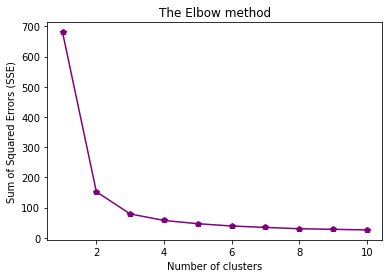

In [15]:
# Plotting the results onto a line graph, 
# Observe 'The elbow'
plt.plot(range(1, 11), wcss, color = 'purple',marker='p')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)') #Within cluster sum of squares
plt.show()

#### From the elbow method, we can see that the number of optimal clusters is 3.

#### We can visualize the elbow as a bending line at k = 3

# K-Means classifier :

In [16]:
# Creating the K-means classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [17]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Visualisation of Clusters :

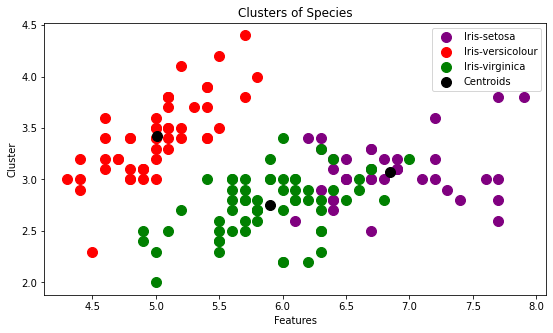

In [18]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(9,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.title('Clusters of Species')
plt.xlabel('Features')
plt.ylabel('Cluster')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

# Stay home, stay safe 😷 

# Thankyou 🙏